In [107]:
import os
print(os.getcwd())
#change working directory to the location of the data file
os.chdir('/mnt/d/Sajjad/08-2023/Python Code/Introduction to Machine Learning/')
print(os.getcwd())
import pandas as pd

/mnt/d/Sajjad/08-2023/Python Code/Introduction to Machine Learning
/mnt/d/Sajjad/08-2023/Python Code/Introduction to Machine Learning


In [108]:
df = pd.read_csv("ISL_DataSets/Boston.csv")
print(df.shape)
print(df.columns)

(506, 14)
Index(['s_no', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'lstat', 'medv'],
      dtype='object')


In [109]:
df.head()

,s_no,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


['crim' 'chas' 'rm' 'ptratio' 'lstat']

In [110]:
#keep crim rm dis ptratio lstat and medv
df2 = df[['crim','rm','dis','ptratio','lstat','medv']]
df2.head()

,crim,rm,dis,ptratio,lstat,medv
0,0.00632,6.575,4.0900,15.3,4.98,24.0
1,0.02731,6.421,4.9671,17.8,9.14,21.6
2,0.02729,7.185,4.9671,17.8,4.03,34.7
3,0.03237,6.998,6.0622,18.7,2.94,33.4
4,0.06905,7.147,6.0622,18.7,5.33,36.2


In [111]:
#store medv in y and other columns in x
X = df2[['crim','rm','dis','ptratio','lstat']]
y = df2['medv']


Computing the means as base (dummy) estimator

In [112]:
#compute mean of y
y_mean = y.mean()
print(y_mean)

22.532806324110677


stroing the mean in y_pred variable

In [113]:
#create a new pandas series with y_mean and length of y, name it y_pred
y_pred = pd.Series([y_mean]*len(y))
print(y_pred.head())
y_pred = y_pred.copy()
df2['y_pred0'] = y_pred.copy()

0    22.532806
1    22.532806
2    22.532806
3    22.532806
4    22.532806
dtype: float64


/tmp/ipykernel_164747/995765550.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['y_pred0'] = y_pred.copy()


In [114]:
df2.head()

,crim,rm,dis,ptratio,lstat,medv,y_pred0
0,0.00632,6.575,4.0900,15.3,4.98,24.0,22.532806
1,0.02731,6.421,4.9671,17.8,9.14,21.6,22.532806
2,0.02729,7.185,4.9671,17.8,4.03,34.7,22.532806
3,0.03237,6.998,6.0622,18.7,2.94,33.4,22.532806
4,0.06905,7.147,6.0622,18.7,5.33,36.2,22.532806


computing residual of Step 0 by subtracting y_pred (mean of y) from each y

In [115]:
residual = y - y_pred
print(residual.head())


0     1.467194
1    -0.932806
2    12.167194
3    10.867194
4    13.667194
dtype: float64


In [116]:
#compute mean square error
mse = (residual**2).mean()
print(mse)

84.41955615616556


In [117]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [118]:
learning_rate = 0.1

Iteration 1

In [120]:
#fit a decision tree regression using X and residual
regressor = DecisionTreeRegressor(random_state=0, max_depth=2)
regressor.fit(X, residual)

#predict on X and store in r_pred
r_pred = regressor.predict(X)
#make r_pred2 a pandas series
r_pred = pd.Series(r_pred)

y_pred = y_pred + learning_rate*r_pred
residual = y - y_pred
df2['y_pred1'] = y_pred.copy()


/tmp/ipykernel_164747/3895186243.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['y_pred1'] = y_pred.copy()


In [121]:
df2.head()

,crim,rm,dis,ptratio,lstat,medv,y_pred0,y_pred1
0,0.00632,6.575,4.0900,15.3,4.98,24.0,22.532806,22.614506
1,0.02731,6.421,4.9671,17.8,9.14,21.6,22.532806,22.614506
2,0.02729,7.185,4.9671,17.8,4.03,34.7,22.532806,23.490830
3,0.03237,6.998,6.0622,18.7,2.94,33.4,22.532806,23.490830
4,0.06905,7.147,6.0622,18.7,5.33,36.2,22.532806,23.490830


In [122]:
residual.head()

0     1.385494
1    -1.014506
2    11.209170
3     9.909170
4    12.709170
dtype: float64

In [123]:
#compute mean square error
mse = (residual**2).mean()
print(mse)

73.26273930239803


Iteration 2

In [124]:
regressor.fit(X, residual)

#predict on X and store in r_pred
r_pred = regressor.predict(X)
#make r_pred2 a pandas series
r_pred = pd.Series(r_pred)

y_pred = y_pred + learning_rate*r_pred
residual = y - y_pred

df2['y_pred2'] = y_pred

/tmp/ipykernel_164747/1697682161.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['y_pred2'] = y_pred


In [125]:
df2.head()

,crim,rm,dis,ptratio,lstat,medv,y_pred0,y_pred1,y_pred2
0,0.00632,6.575,4.0900,15.3,4.98,24.0,22.532806,22.614506,23.053411
1,0.02731,6.421,4.9671,17.8,9.14,21.6,22.532806,22.614506,23.053411
2,0.02729,7.185,4.9671,17.8,4.03,34.7,22.532806,23.490830,23.929735
3,0.03237,6.998,6.0622,18.7,2.94,33.4,22.532806,23.490830,23.929735
4,0.06905,7.147,6.0622,18.7,5.33,36.2,22.532806,23.490830,23.929735


In [126]:
residual.head()

0     0.946589
1    -1.453411
2    10.770265
3     9.470265
4    12.270265
dtype: float64

In [127]:
#compute mean square error
mse = (residual**2).mean()
print(mse)

63.934595104101824


Iteration 3

In [128]:
regressor.fit(X, residual)

#predict on X and store in r_pred
r_pred = regressor.predict(X)
#make r_pred2 a pandas series
r_pred = pd.Series(r_pred)

y_pred = y_pred + learning_rate*r_pred
residual = y - y_pred

df2['y_pred3'] = y_pred

/tmp/ipykernel_164747/693308779.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['y_pred3'] = y_pred


In [129]:
df2.head()

,crim,rm,dis,ptratio,lstat,medv,y_pred0,y_pred1,y_pred2,y_pred3
0,0.00632,6.575,4.0900,15.3,4.98,24.0,22.532806,22.614506,23.053411,23.079604
1,0.02731,6.421,4.9671,17.8,9.14,21.6,22.532806,22.614506,23.053411,23.079604
2,0.02729,7.185,4.9671,17.8,4.03,34.7,22.532806,23.490830,23.929735,24.703360
3,0.03237,6.998,6.0622,18.7,2.94,33.4,22.532806,23.490830,23.929735,24.703360
4,0.06905,7.147,6.0622,18.7,5.33,36.2,22.532806,23.490830,23.929735,24.703360


In [130]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
y.head()

### running the algorithm in a loop for x number of iterations

Final MSE: 0.13728907604734872
Learned Tree: DecisionTreeRegressor(max_depth=2)
73.26273930239805 0.13728907604734872


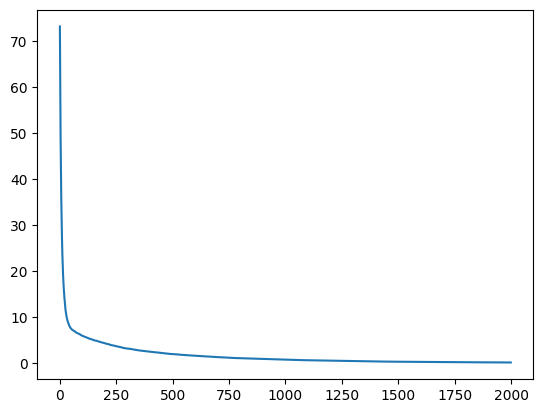

In [135]:
# Generate synthetic data for illustration
np.random.seed(42)

# Set the number of iterations and learning rate
n_iterations = 2000 # 200, 500, 1000, 2000, 3000
learning_rate = 0.1

# Initialize the model
tree_reg = DecisionTreeRegressor(max_depth=2)

# Initialize an empty list to store MSE values
mse_list = []

#initialize y_pred with mean of y
y_pred = pd.Series([y_mean]*len(y))
residual = y - y_pred


# Gradient Descent loop
for iteration in range(n_iterations):
    # Fit the model with the current data
    
    tree_reg.fit(X, residual)
    # Make a prediction with the current model
    r_pred = tree_reg.predict(X)

    # Update the target values (y) by adding the scaled predictions
    y_pred += learning_rate * r_pred
    
    # Compute the residuals 
    residual = y - y_pred
  
    
    # Compute the mean square error (MSE) and append to the list
    mse = np.mean(residual**2)
    #print(mse)
    mse_list.append(mse)

# Print the last MSE and the learned model (if needed)
print("Final MSE:", mse_list[-1])
print("Learned Tree:", tree_reg)

# You can access the list of MSE values for each iteration in mse_list
print(mse_list[0], mse_list[-1])
plt.plot(mse_list)


### comparing the performance with Linear/Polynomial regression

In [136]:
#Import linear regression
from sklearn.linear_model import LinearRegression
#apply polynomial regression
from sklearn.preprocessing import PolynomialFeatures

In [137]:
poly = PolynomialFeatures(degree=2)
X2 = poly.fit_transform(X)
X2.shape
print(X2.shape)
print(poly.get_feature_names_out())

(506, 21)
['1' 'crim' 'rm' 'dis' 'ptratio' 'lstat' 'crim^2' 'crim rm' 'crim dis'
 'crim ptratio' 'crim lstat' 'rm^2' 'rm dis' 'rm ptratio' 'rm lstat'
 'dis^2' 'dis ptratio' 'dis lstat' 'ptratio^2' 'ptratio lstat' 'lstat^2']


In [138]:

reg2 = LinearRegression().fit(X2, y)
y_pred = reg2.predict(X2)
residual = y - y_pred
#compute mean square error
mse = (residual**2).mean()
print(mse)

12.933991885923827
